<a href="https://colab.research.google.com/github/KiranRockzz/PySpark-on-Kubernetes-Word-Count-PageRank/blob/main/Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Use 'ggplot' style for plots
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (20.0, 10.0)



In [ ]:
num_points_each_cluster = 100

# Parameters for the first cluster
mu1 = [-0.4, 3]
covar1 = [[1.3, 0], [0, 1]]

# Parameters for the second cluster
mu2 = [0.5, 0.75]
covar2 = [[2.2, 1.2], [1.8, 2.1]]

# Generate random points for each cluster
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)

# Create labels for the clusters
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

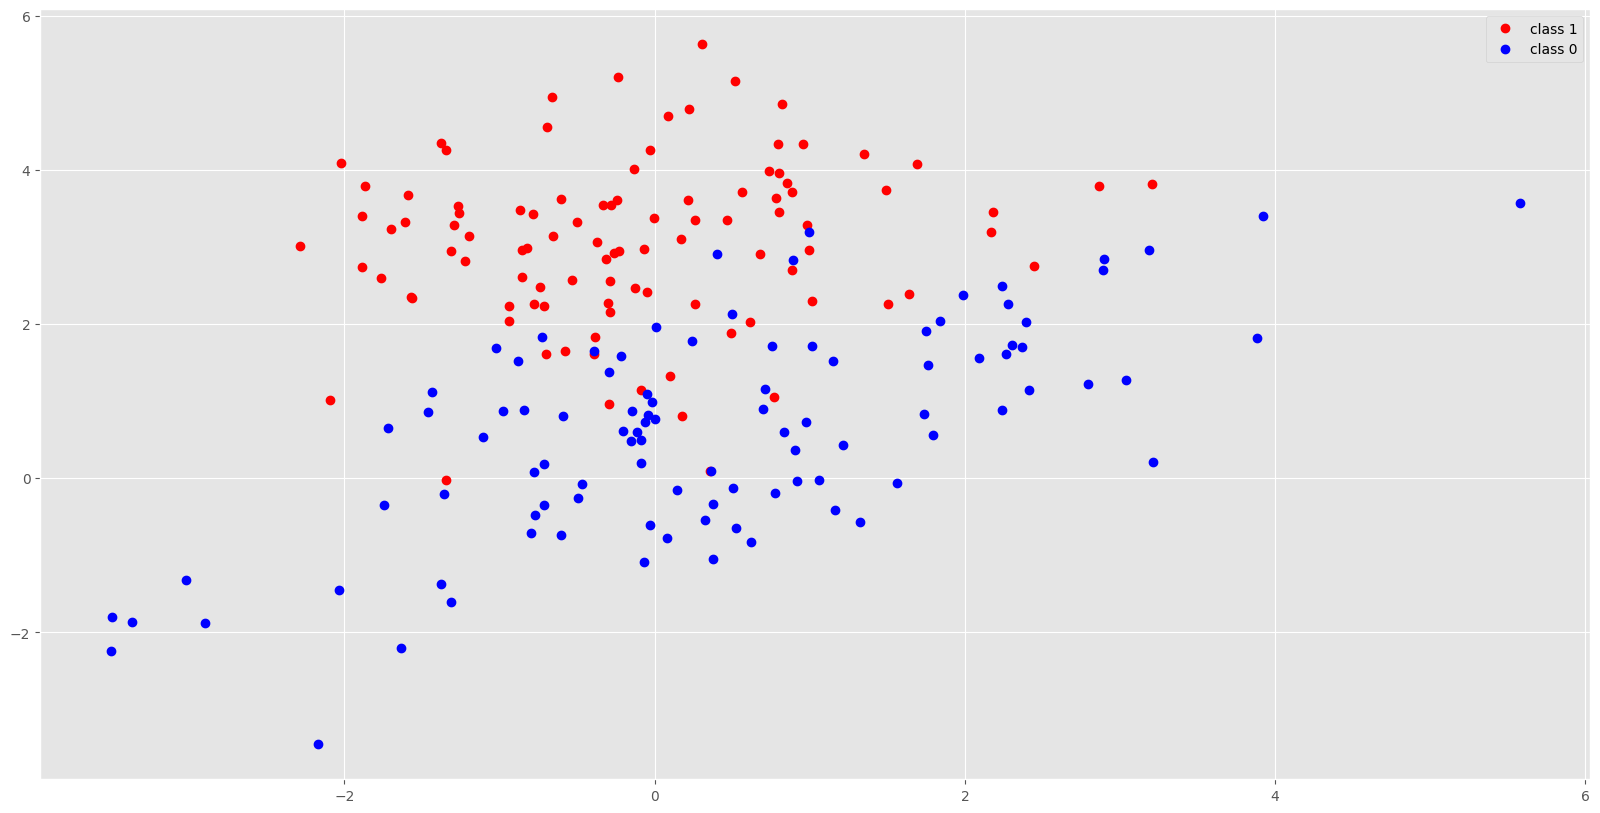

In [ ]:
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:, 1], 'bo', label='class 0')

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()

In [ ]:
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

# Print the shapes of X and y
print(X.shape, y.shape)

# Convert the data to TensorFlow constants
X_tf = tf.constant(X, dtype=tf.float64)
y_tf = tf.constant(y, dtype=tf.float64)

def predict(X_t, y_t, x_t, k_t):
    neg_one = tf.constant(-1.0, dtype=tf.float64)
    # Compute the L-1 distance
    distances = tf.reduce_sum(tf.abs(tf.subtract(X_t, x_t)), axis=1)
    # Find the farthest points based on negative distances
    neg_distances = tf.multiply(distances, neg_one)
    # Get the indices of the k nearest points
    vals, indx = tf.nn.top_k(neg_distances, k=k_t)
    # Slice the labels of these points
    y_s = tf.gather(y_t, indx)
    return y_s

def get_label(preds):
    counts = np.bincount(preds.astype('int64'))
    return np.argmax(counts)

(200, 2) (200,)


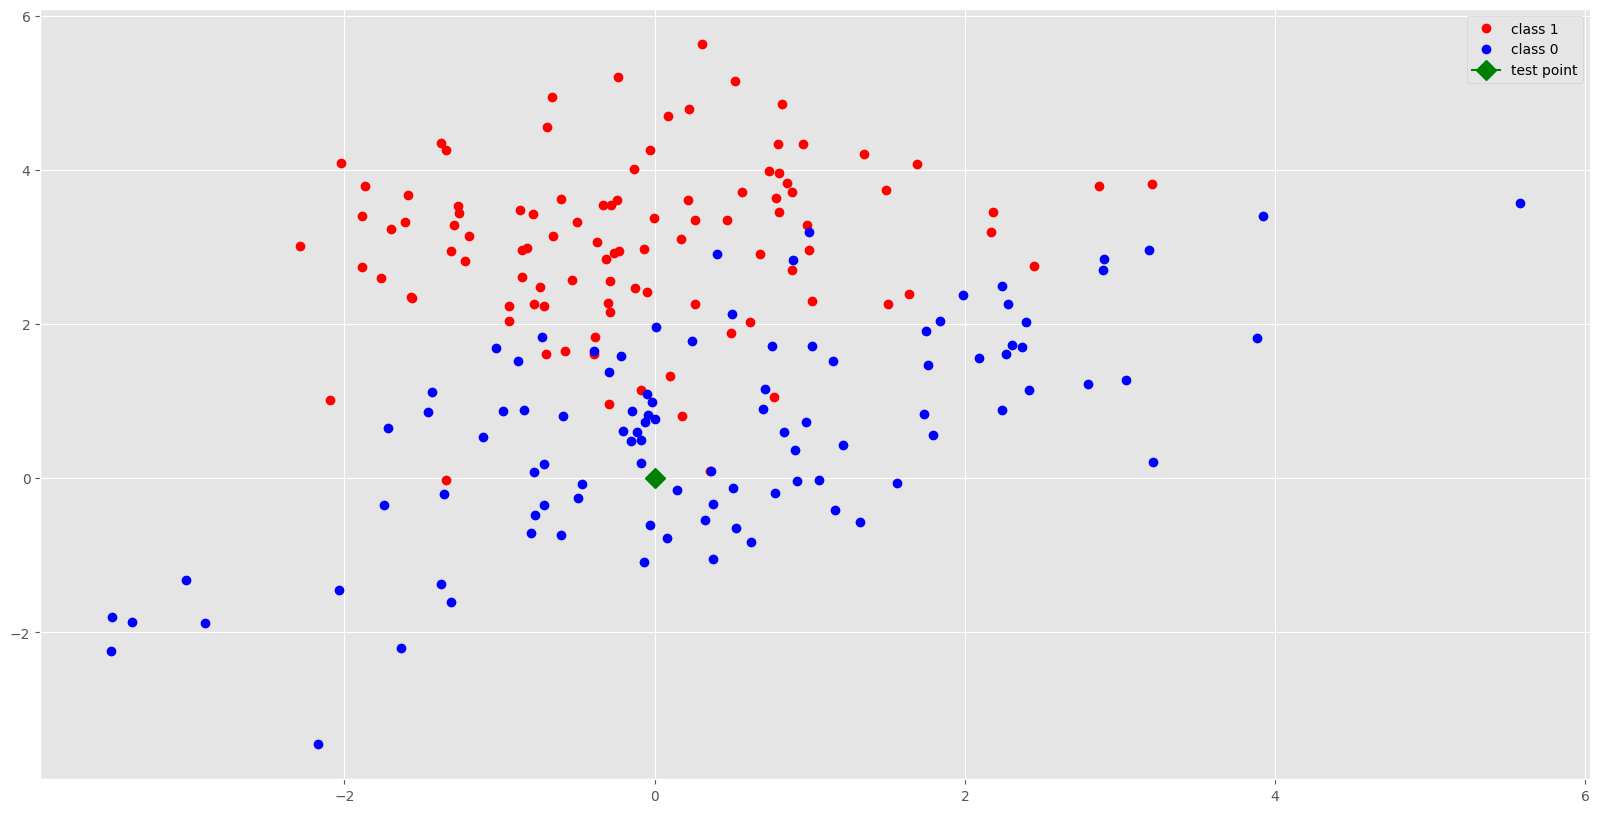

In [ ]:
example = np.array([0, 0])
example_tf = tf.constant(example, dtype=tf.float64)

# Plot the data points for each cluster
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:, 1], 'bo', label='class 0')
plt.plot(example[0], example[1], 'g', marker='D', markersize=10, label='test point')

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()

In [ ]:
k_tf = tf.constant(3)

# Call the predict function directly as TensorFlow 2.x supports eager execution
pr = predict(X_tf, y_tf, example_tf, k_tf)

# Convert the TensorFlow tensor to a NumPy array for the get_label function
y_index = pr.numpy()

# Get the label using the get_label function
print(get_label(y_index))

0


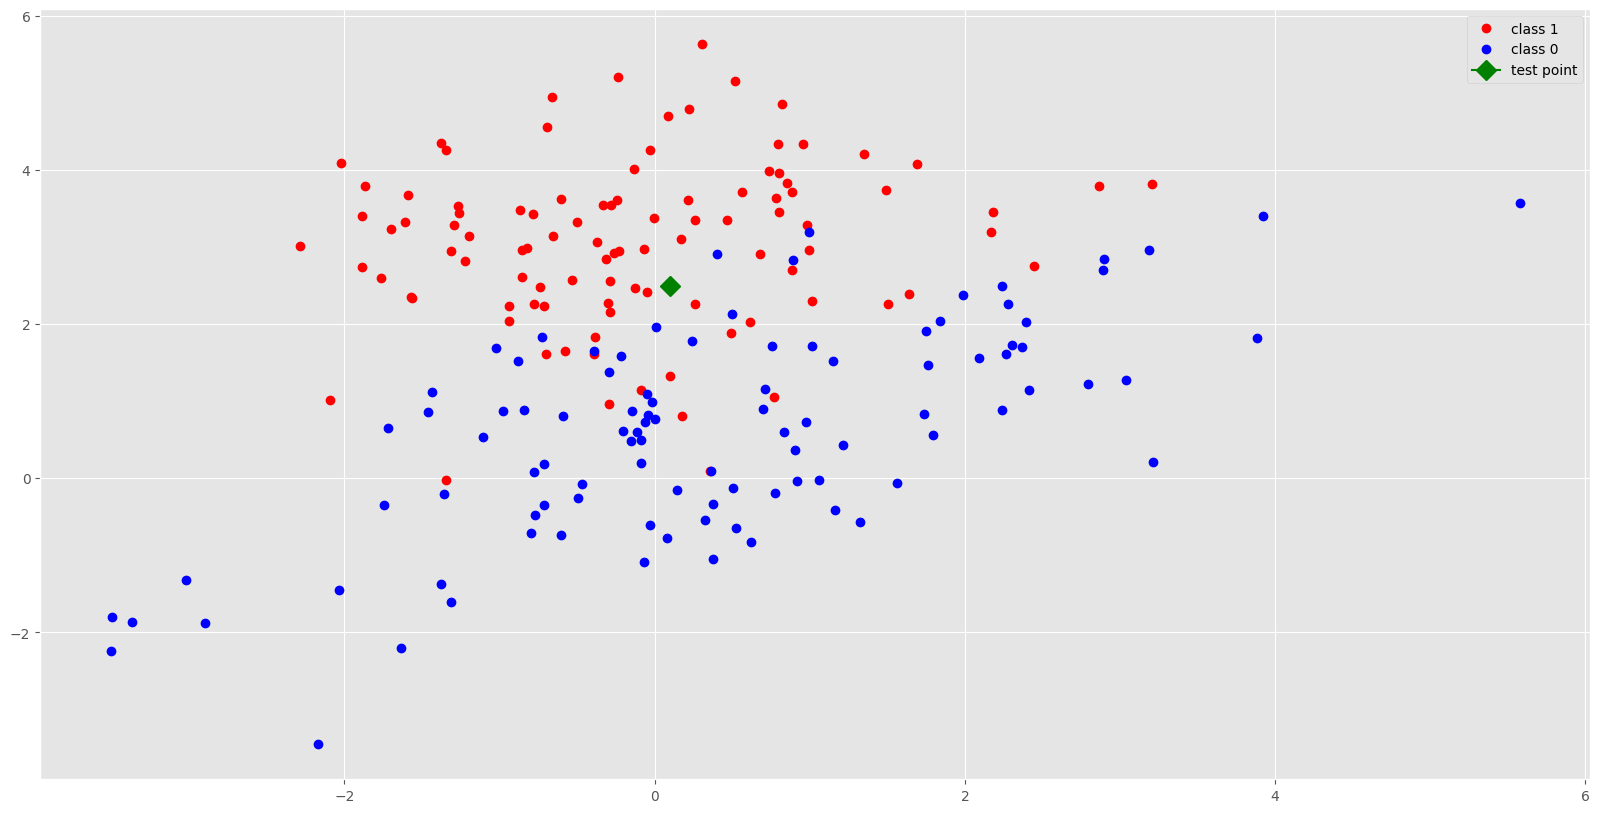

In [ ]:
example_2 = np.array([0.1, 2.5])
example_2_tf = tf.constant(example_2, dtype=tf.float64)

# Plot the data points for each cluster and the new example point
plt.plot(X1[:, 0], X1[:, 1], 'ro', label='class 1')
plt.plot(X2[:, 0], X2[:, 1], 'bo', label='class 0')
plt.plot(example_2[0], example_2[1], 'g', marker='D', markersize=10, label='test point')

# Add a legend
plt.legend(loc='best')

# Display the plot
plt.show()

In [ ]:
pr = predict(X_tf, y_tf, example_2_tf, k_tf)

# Convert the TensorFlow tensor to a NumPy array for the get_label function
y_index = pr.numpy()

# Get the label using the get_label function
print(get_label(y_index))

1


In [ ]:
num_points_each_cluster = 100

# Parameters for the first cluster
mu1 = [-0.4, 3]
covar1 = [[1.3, 0], [0, 1]]

# Parameters for the second cluster
mu2 = [0.5, 0.75]
covar2 = [[2.2, 1.2], [1.8, 2.1]]

# Generate random points for each cluster
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)

# Create labels for the clusters
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)